### 시계열 데이터
- 순서가 있는 데이터(ex: 언어)
- 기존의 독립적인 신경망으로는 효율적이지 않음
- RNN 방법 고안
- 앞서 받은 데이터를 잠시 기억해놨다가 중요도를 판단하여 별도 가중치를 줘서 다음데이터로 넘김
- 층이 여러단계를 하다보면 기울기를 계속 반영하다보면 기울기가 작아져서 소실될수있음
- 쓸데없는 미사여구까지 계산할 수 있음
- LSTM 방법 고안됨
- https://dgkim5360.tistory.com/entry/understanding-long-short-term-memory-lstm-kr

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import reuters
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras import utils

In [2]:
(X_train, Y_train), (X_test, Y_test) = reuters.load_data(num_words=1000, test_split=0.2)
#빈도수가 1~1000번인것만 씀, 그 이상은 쓰지 않음
#테스트셋으로 20%주기

C:\Users\Administrator\anaconda3\envs\hy-env\lib\site-packages\tensorflow\python\keras\datasets\reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\Administrator\anaconda3\envs\hy-env\lib\site-packages\tensorflow\python\keras\datasets\reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [3]:
category = np.max(Y_train) + 1
print(category, '카테고리')
print(len(X_train), '학습용 뉴스 기사')
print(len(X_test), '테스트용 뉴스 기사')
print(X_train[0])

46 카테고리
8982 학습용 뉴스 기사
2246 테스트용 뉴스 기사
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [4]:
x_train = sequence.pad_sequences(X_train, maxlen=100)
x_test = sequence.pad_sequences(X_test, maxlen=100)
y_train = utils.to_categorical(Y_train)
y_test = utils.to_categorical(Y_test)

In [5]:
model = Sequential()
model.add(Embedding(1000,100))
model.add(LSTM(100, activation='tanh'))
model.add(Dense(46, activation='softmax'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 100)         100000    
_________________________________________________________________
lstm (LSTM)                  (None, 100)               80400     
_________________________________________________________________
dense (Dense)                (None, 46)                4646      
Total params: 185,046
Trainable params: 185,046
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
history = model.fit(x_train, y_train, batch_size=100, epochs=20, validation_data=(x_test, y_test))

Epoch 1/20
90/90 [==============================] - 9s 102ms/step - loss: 2.5852 - accuracy: 0.3466 - val_loss: 2.3802 - val_accuracy: 0.3620
Epoch 2/20
90/90 [==============================] - 8s 93ms/step - loss: 2.1076 - accuracy: 0.4761 - val_loss: 2.0126 - val_accuracy: 0.5147
Epoch 3/20
90/90 [==============================] - 8s 91ms/step - loss: 2.0597 - accuracy: 0.4703 - val_loss: 2.0449 - val_accuracy: 0.4902
Epoch 4/20
90/90 [==============================] - 8s 94ms/step - loss: 1.9616 - accuracy: 0.4930 - val_loss: 1.8982 - val_accuracy: 0.5013
Epoch 5/20
90/90 [==============================] - 9s 96ms/step - loss: 1.7621 - accuracy: 0.5404 - val_loss: 1.7243 - val_accuracy: 0.5570
Epoch 6/20
90/90 [==============================] - 8s 93ms/step - loss: 1.6718 - accuracy: 0.5625 - val_loss: 1.6952 - val_accuracy: 0.5623
Epoch 7/20
90/90 [==============================] - 9s 95ms/step - loss: 1.5863 - accuracy: 0.5952 - val_loss: 1.5922 - val_accuracy: 0.6051
Epoch 8/20
9

In [11]:
print("Test Accuracy: %.4f" % (model.evaluate(x_test, y_test)[1]))

71/71 [==============================] - 1s 16ms/step - loss: 1.1970 - accuracy: 0.7053
Test Accuracy: 0.7053


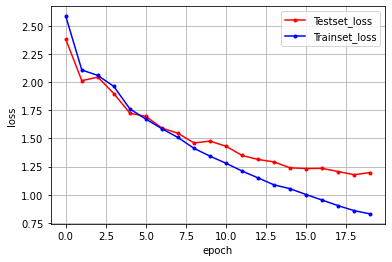

In [12]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()